<a href="https://colab.research.google.com/github/Elman295/CIFAR10/blob/main/Single_layer(Linear_classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CIFAR10***

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Source : https://www.cs.toronto.edu/~kriz/cifar.html



In [ ]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python import metrics

Load Data

In [ ]:
data = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = data.load_data()

x_train, x_test = x_train/255.0, x_test/255.0 # convert [0,255] t0 [0,1]

print(f"shape of x_train = {x_train.shape}")
print(f"shape of x_test = {x_test.shape}")
print(f"shape of y_train = {y_train.shape}")
print(f"shape of y_test = {y_test.shape}")

shape of x_train = (50000, 32, 32, 3)
shape of x_test = (10000, 32, 32, 3)
shape of y_train = (50000, 1)
shape of y_test = (10000, 1)


50000 picture (32 * 32) with 3 channels (r,g,b)

In [ ]:
num_features = 32 * 32 * 3

x_train = x_train.reshape(-1, num_features)
x_test = x_test.reshape(-1, num_features)

print(f"scaled x_train shape : {x_train.shape}")
print(f"scaled x_test shape: {x_test.shape}")

scaled x_train shapes : (50000, 3072)
scaled x_test shapes: (10000, 3072)


Creating the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 10 ,input_shape = (num_features,), activation = "softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
y_pred = model(x_train[:1]).numpy()
loss = loss_fn(y_train[0], y_pred).numpy()
loss

2.2958114

Compiling and fitting the model

In [ ]:

model.compile(
    optimizer = "sgd", # gradient 
    loss = loss_fn,
    metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs = 10,
    shuffle = True
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 4s 2ms/step - loss: 1.9487 - accuracy: 0.3024
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8449 - accuracy: 0.3505
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8146 - accuracy: 0.3661
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7966 - accuracy: 0.3726
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7841 - accuracy: 0.3786
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7736 - accuracy: 0.3837
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7642 - accuracy: 0.3876
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7565 - accuracy: 0.3906
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7519 - accuracy: 0.3913
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7484 - accurac

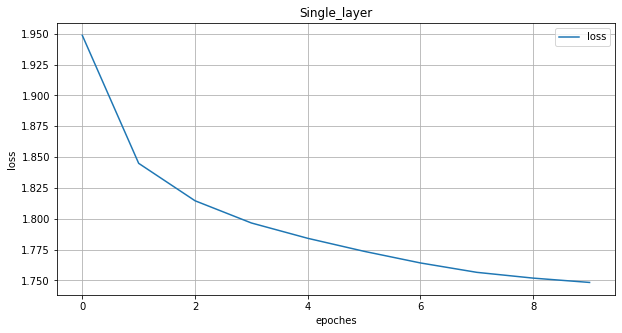

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"], label = "loss")
plt.grid()
plt.legend()
plt.title("Single_layer")
plt.xlabel("epoches")
plt.ylabel("loss")
plt.show()

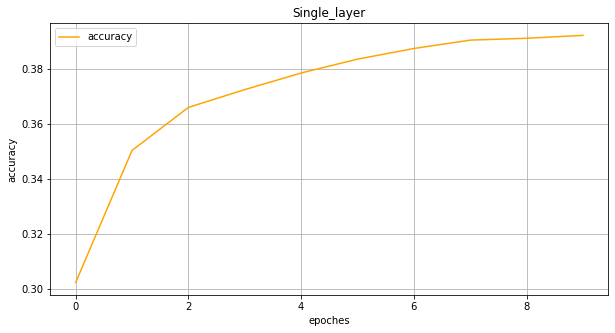

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], label = "accuracy", color = "orange")
plt.grid()
plt.legend()
plt.title("Single_layer")
plt.xlabel("epoches")
plt.ylabel("accuracy")
plt.show()

In [ ]:
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 1.7787 - accuracy: 0.3748 - 452ms/epoch - 1ms/step


[1.7786818742752075, 0.3747999966144562]

Saving the model

In [ ]:
model.save("single_layer.h5")